1번

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split


# 랜덤한 [40,4] 크기의 dataset 생성
dataset = np.random.random([40,4]) 

# 1. dataset의 0번부터 2번 column 인덱스까지의 배열을 feature로 저장합니다.
feature = dataset[:,0:3]
# 2. dataset의 마지막 column 인덱스의 column 벡터를 label로 저장합니다.
label = dataset[:,3]

# 전체 데이터를 학습 데이터와 검증 데이터로 나눕니다.
# 3. 테스트용 데이터의 크기를 0.25로 하여 전체 데이터를 분리합니다.random_state는 121을 입력합니다.
X_train, X_test, Y_train, Y_test = train_test_split(feature,
                                                    label,
                                                    test_size=0.25,
                                                    random_state=121)

# 분리된 데이터의 크기들을 출력
print("Case 1.")
print("X_train shape : {}".format(X_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("Y_train shape : {}".format(Y_train.shape))
print("Y_test shape : {}".format(Y_test.shape))

# 4. shuffle을 하지 않고 test_size를 0.3으로 하여 학습용 데이터와 테스트용 데이터를 분리합니다. random_state는 121을 입력합니다.
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(feature,
                                                            label,
                                                            test_size=0.25,
                                                            random_state=121,
                                                            shuffle=False)

# 분리된 데이터의 크기들을 출력
print("\nCase 2.")
print("X_train_2 shape : {}".format(X_train_2.shape))   
print("X_test_2 shape : {}".format(X_test_2.shape))
print("Y_train_2 shape : {}".format(Y_train_2.shape))
print("Y_test_2 shape : {}".format(Y_test_2.shape))


Case 1.
X_train shape : (30, 3)
X_test shape : (10, 3)
Y_train shape : (30,)
Y_test shape : (10,)

Case 2.
X_train_2 shape : (30, 3)
X_test_2 shape : (10, 3)
Y_train_2 shape : (30,)
Y_test_2 shape : (10,)


2번

In [2]:
import pandas as pd
import numpy as np

DATA_PATH = r"C:\Users\302-28\pratice\Exam-250314\250314-Exam2\data\taxi_fare_data.csv"

def load_csv(path):
    # pandas를 이용하여 'taxi_fair_data.csv' 데이터를 불러옵니다.
    data_frame = pd.read_csv(path)
    
    return data_frame

def statistical_features(data):
    # numpy를 이용하여 (리스트)데이터의 통계적 정보를 추출합니다.
    
    _min = data.min()
    _max = data.max()
    _mean = data.mean()
    _median = data.median()
    _var = data.var()
    _std = data.std()
    
    return _min, _max, _mean, _median, _var, _std

df = load_csv(DATA_PATH)
#전체 데이터에 대한 요약 정보를 살펴봅니다.
df.info()

#'fare_amount'변수에 대한 통계적 정보를 살펴봅니다.
f_min, f_max, f_mean, f_median, f_var, f_std = statistical_features(df.fare_amount)
print('\nfare_amount의', '최솟값:', f_min ,'최댓값:', f_max ,'평균값:', f_mean ,'중앙값:', f_median ,'분산값:', f_var ,'표준편차값:', f_std)

#'passenger_count'변수에 대한 통계적 정보를 살펴봅니다.
p_min, p_max, p_mean, p_median, p_var, p_std = statistical_features(df['passenger_count'])
print('passenger_count의', '최솟값:', p_min ,'최댓값:', p_max ,'평균값:', p_mean ,'중앙값:', p_median ,'분산값:', p_var ,'표준편차값:', p_std)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   id                 1000 non-null   int64  
 2   pickup_datetime    1000 non-null   object 
 3   pickup_latitude    1000 non-null   int64  
 4   pickup_longitude   1000 non-null   int64  
 5   dropoff_latitude   991 non-null    float64
 6   dropoff_longitude  992 non-null    float64
 7   passenger_count    1000 non-null   int64  
 8   fare_amount        1000 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 70.4+ KB

fare_amount의 최솟값: -100 최댓값: 99 평균값: 45.102 중앙값: 48.0 분산값: 1148.4340300300294 표준편차값: 33.888553082568
passenger_count의 최솟값: -2 최댓값: 5 평균값: 1.424 중앙값: 1.0 분산값: 5.195419419419397 표준편차값: 2.2793462701878795


3번

In [3]:
import pandas as pd
import numpy as np

# 데이터 주소
DATA_PATH = r"C:\Users\302-28\pratice\Exam-250314\250314-Exam2\data\taxi_fare_data.csv"

# pandas를 이용하여 데이터를 DataFrame의 형태로 불러오는 load_csv 함수를 설정합니다.
def load_csv(path):
    data_frame = pd.read_csv(path)
    return data_frame

# load_csv 함수를 사용하여 데이터를 불러와 df에 저장합니다.
df = load_csv(DATA_PATH)

print("누락된 데이터(Missing Data)를 제거하기 전의 데이터 정보")
df.info()

# df에서 "Unnamed: 0" 컬럼을 제거하고 del_un_df에 저장합니다.
del_un_df = df.drop('Unnamed: 0',axis=1)

# del_un_df에서 "id" 컬럼을 제거하고 del_un_id_df에 저장합니다.
del_un_id_df = del_un_df.drop('id',axis=1)

# del_un_id_df의 결측치가 포함된 행을 제거하고 removed_df에 저장합니다.
removed_df = del_un_id_df.dropna()
print("\n결측치(Missing Data)를 제거한 후의 데이터 정보")
removed_df.info()


누락된 데이터(Missing Data)를 제거하기 전의 데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   id                 1000 non-null   int64  
 2   pickup_datetime    1000 non-null   object 
 3   pickup_latitude    1000 non-null   int64  
 4   pickup_longitude   1000 non-null   int64  
 5   dropoff_latitude   991 non-null    float64
 6   dropoff_longitude  992 non-null    float64
 7   passenger_count    1000 non-null   int64  
 8   fare_amount        1000 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 70.4+ KB

결측치(Missing Data)를 제거한 후의 데이터 정보
<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    991 non-null 

4번

In [4]:
import pandas as pd
import numpy as np

DATA_PATH = r"C:\Users\302-28\pratice\Exam-250314\250314-Exam2\data\taxi_fare_data.csv"

# 데이터를 DataFram의 형태로 불러옵니다.
df = pd.read_csv(DATA_PATH, quoting=3)

# 결측값 처리 함수입니다.
def del_missing(df):
    
    # df에서 Unnamed: 0 feature 데이터를 제거하고 del_un_df에 저장합니다.
    del_un_df = df.drop(['Unnamed: 0'], axis='columns')

    # del_un_df에서 id feature 데이터를 제거하고 del_un_id_df에 저장합니다.
    del_un_id_df = del_un_df.drop(['id'], axis='columns')
    
    # del_un_id_df의 누락된 데이터가 있는 행을 제거하고 removed_df에 저장합니다.
    removed_df = del_un_id_df.dropna()
    
    return removed_df

# 1.리스트를 입력으로 받아서 해당 리스트 내에 음수값이 있으면 그 위치(인덱스)들을 리스트로 출력하는 함수를 만듭니다.  
def get_negative_index(list_data):
    
    neg_idx = []
    
    for i, value in enumerate(list_data):
        # 음수값이 있으면 그 위치(인덱스)들을 neg_idx로 추가시킵니다.
        # value값이 음수일 때 해당하는 인덱스 i를 리스트 neg_idx에 append하세요.
        if value < 0 :
            neg_idx.append(list_data.index[i])
        
    return neg_idx

# 2.DataFrame 내에 제거해야 하는 이상 값의 인덱스를 반환하는 함수를 만듭니다.
def outlier_index():
    
    # get_negative_index() 함수를 통해서,
    # fare_amount와 passenger_count 내의 음수값들의 인덱스를 반환합니다.
    idx_fare_amount = get_negative_index(fare_amount)
    idx_passenger_count = get_negative_index(passenger_count)
    
    idx_zero_distance = []    
    idx = [i for i in range(len(passenger_count))]
    zipped = zip(idx, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)
    
    # 결측치 처리를 수행하게 되면 Dataframe의 인덱스와 i 값은 다릅니다.
    # Dataframe.index[i]를 사용하여 Dataframe의 인덱스를 저장해봅시다.
    for i, x, y, _x, _y in zipped:
    
        # 타는 곳(pickup_longitude,pickup_latitude)과 내리는 곳(drop_longitude, drop_latitude)이
        # 같은 데이터의 인덱스를 idx_zero_distance에 저장합니다.
        # x와 _x가, y가 y_y와 같을 때 해당하는 인덱스 i를 idx_zero_distance에 append하세요.
        if (x == _x) or (y == _y):
            idx_zero_distance.append(i)
    
    # 제거해야하는 인덱스의 리스트들(idx_fare_amount,idx_passenger_count,idx_zero_distance)
    # 간의 중복을 없앤 리스트를 만들어줍니다.
    total_index4remove = list(set(idx_fare_amount+idx_passenger_count+idx_zero_distance))
    
    return total_index4remove

# 3.인덱스를 기반으로 DataFrame 내의 데이터를 제거하고, 제거된 DataFrame을 반환하는 함수를 만듭니다.
def remove_outlier(dataframe, list_idx):
    return dataframe.drop(list_idx,axis = 0)

# del_missing 함수로 결측치를 처리하여 df에 저장합니다.
df = del_missing(df)

# 불러온 DataFrame의 각 인덱스의 값들을 변수로 저장합니다.
fare_amount = df['fare_amount']
passenger_count = df['passenger_count']
pickup_longitude = df['pickup_longitude']
pickup_latitude = df['pickup_latitude']
dropoff_longitude = df['dropoff_longitude']
dropoff_latitude = df['dropoff_latitude']

# 이상치를 제거하기 전의 데이터 정보를 확인해 봅시다.
print('이상치를 제거하기 전의 데이터:')
df.info()

# 이상치를 제거합니다.
remove_index = outlier_index()
new = remove_outlier(df, remove_index)

# 이상치를 제거한 후의 데이터를 살펴봅니다.
print('\n이상치를 제거한 후의 데이터:')
new.info()


이상치를 제거하기 전의 데이터:
<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    991 non-null    object 
 1   pickup_latitude    991 non-null    int64  
 2   pickup_longitude   991 non-null    int64  
 3   dropoff_latitude   991 non-null    float64
 4   dropoff_longitude  991 non-null    float64
 5   passenger_count    991 non-null    int64  
 6   fare_amount        991 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 61.9+ KB

이상치를 제거한 후의 데이터:
<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 1 to 998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    711 non-null    object 
 1   pickup_latitude    711 non-null    int64  
 2   pickup_longitude   711 non-null    int64  
 3   dropoff_latitude   711 non

5번

In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\302-28\pratice\Exam-250314\250314-Exam2\data\taxi_fare_data.csv", quoting=3)

# 불러온 pickup_datetime은 ['2009-06-15 17:26:21 UTC', ...] 과 같은 형태를 지니고 있습니다.
pickup_datetime = df['pickup_datetime'] 
# 우선 연월일('YYYY-MM-DD')와 시간('HH:MM:SS')로 나누어 주고 이를 year_date, time 변수로 각각 넣어줍니다.
year_date = []
time = []

for data in pickup_datetime :
    a,b=data.split(' ')
    year_date.append(a)
    time.append(b)

# 연월일 변수에서 각각의 '연도', '월', '일'을 추출하여 years, months, days 변수에 넣어줍니다.
years = []
months = []
days = []

for data in year_date:
    ye,mon,da = data.split('-')
    years.append(ye)
    months.append(mon)
    days.append(da)

#시간만 따로 int의 형태로 추출합니다.
hours = []
for i in time:
    a=i.split(':')[0]
    hours.append(a)



#각 변수의 상위 10개씩만 출력해서 추출이 제대로 되었는지 확인해봅시다.
print(years[:10])
print(months[:10])
print(days[:10])
print(hours[:10])


['2015', '2015', '2017', '2017', '2017', '2015', '2017', '2017', '2015', '2015']
['01', '10', '05', '05', '04', '04', '04', '10', '07', '03']
['07', '21', '07', '14', '11', '26', '09', '18', '21', '04']
['15', '22', '3', '9', '16', '3', '13', '6', '7', '14']


6번

In [6]:
import numpy as np
import pandas as pd

DATA_PATH = r"C:\Users\302-28\pratice\Exam-250314\250314-Exam2\data\data.csv"


def get_data() -> pd.DataFrame:
    "데이터를 불러오는 함수"

    df = pd.read_csv(DATA_PATH)
    return df


def add_type(df: pd.DataFrame) -> pd.DataFrame:                                 # numpy.where(조건, 값1, 값2) - `조건`을 만족하는 데이터를 `값1`로, 그렇지 않은 데이터를 `값2`로 변환하는 함수입니다.                                  
    "지시사항에 따라 df에 Type칼럼을 추가하고 반환합니다."
    df['Type'] =np.where(df['Age']>=19,'adult',np.where(df['Sex']=='male','boy','girl'))
    return df

def main():
    # 데이터 불러오기
    df = get_data()
    print("추가 전\n", df.head())

    # 1. 새로운 특성 생성
    df_new = add_type(df.copy())
    print("추가 후\n", df_new.head())


if __name__ == "__main__":
    main()


추가 전
    PassengerId                                               Name     Sex  \
0           25                      Palsson, Miss. Torborg Danira  female   
1           26  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female   
2           28                     Fortune, Mr. Charles Alexander    male   
3           31                           Uruchurtu, Don. Manuel E    male   
4           34                              Wheadon, Mr. Edward H    male   

    Age  
0   8.0  
1  38.0  
2  19.0  
3  40.0  
4  66.0  
추가 후
    PassengerId                                               Name     Sex  \
0           25                      Palsson, Miss. Torborg Danira  female   
1           26  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female   
2           28                     Fortune, Mr. Charles Alexander    male   
3           31                           Uruchurtu, Don. Manuel E    male   
4           34                              Wheadon, Mr. Edward H    male   

  

7번

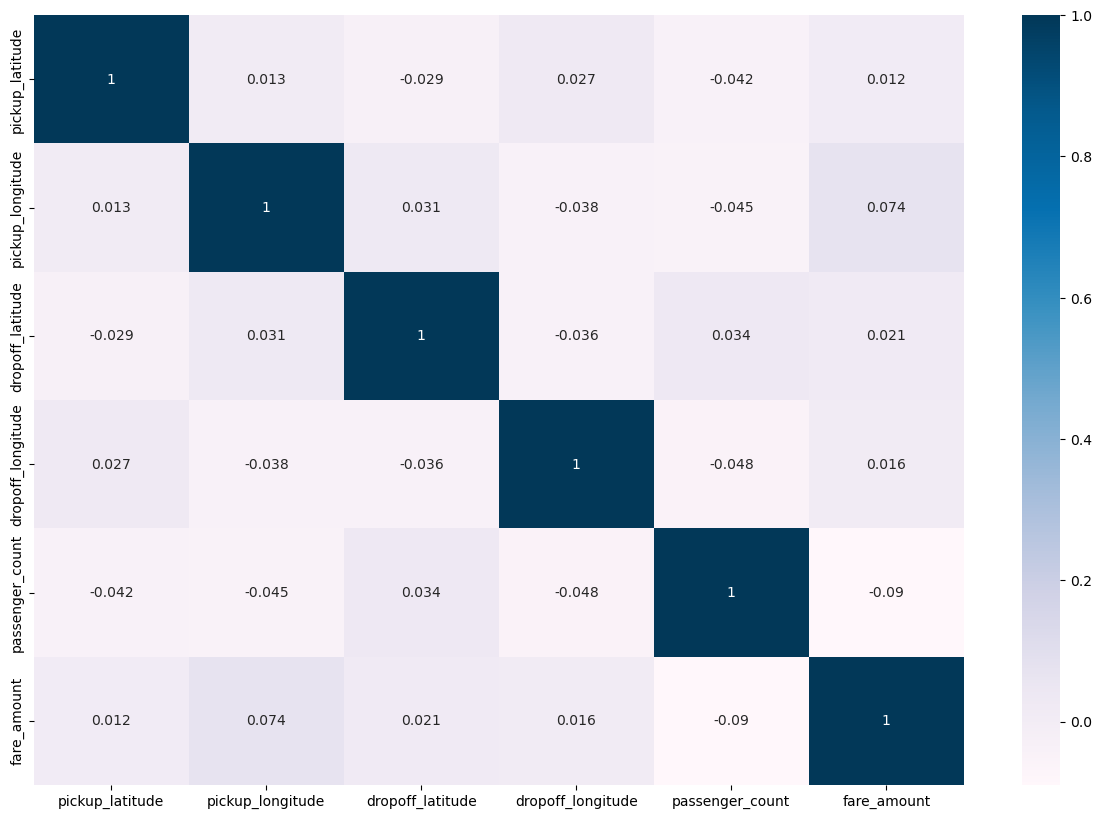

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 데이터 주소
DATA_PATH = r"C:\Users\302-28\pratice\Exam-250314\250314-Exam2\data\taxi_fare_data.csv"

#데이터를 DataFram의 형태로 불러옵니다.
def load_csv(path):
    data_frame = pd.read_csv(path)
    return data_frame

# 결측치 처리 함수입니다.
def del_missing(df):
    
    # df에서 Unnamed: 0 feature 데이터를 제거하고 del_un_df에 저장합니다.
    del_un_df = df.drop(['Unnamed: 0'], axis='columns')
    
    # del_un_df에서 id feature 데이터를 제거하고 del_un_id_df에 저장합니다.
    del_un_id_df = del_un_df.drop(['id'], axis='columns')
    
    # del_un_id_df의 누락된 데이터가 있는 행을 제거하고 removed_df에 저장합니다.
    removed_df = del_un_id_df.dropna()
    
    return removed_df

# 리스트를 입력으로 받아서 해당 리스트 내에 음수값이 있으면 그 위치(인덱스)들을 리스트로 출력하는 함수를 만듭니다.
def get_negative_index(list_data):
    neg_idx = []
    
    for i, value in enumerate(list_data):
        if value < 0:
            neg_idx.append(list_data.index[i]) # 왜 i가 아닌지?? list_data.index[i]는 i값이 위치한 인덱스값을 얻는거 아닌지?
            
    return neg_idx

# DataFrame 내에 제거해야 하는 이상치의 인덱스를 반환하는 함수를 만듭니다.
def outlier_index():
    # get_negative_index() 함수를 통해서, fare_amount와 passenger_count 내의 음수값들의 인덱스를 반환합니다.
    idx_fare_amount = get_negative_index(fare_amount)
    idx_passenger_count = get_negative_index(passenger_count)
    
    idx_zero_distance = []    
    idx = [i for i in range(len(passenger_count))]
    zipped = zip(idx, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)
    
    for i, x, y, _x, _y in zipped:
        # 타는 곳(pickup_longitude,pickup_latitude)과 내리는 곳(drop_longitude, drop_latitude)이 같은 데이터의 인덱스를 idx_zero_distance에 저장합니다.
        if (x == _x) and (y == _y):
            idx_zero_distance.append(i)
            
    total_index4remove = list(set(idx_fare_amount+idx_passenger_count+idx_zero_distance))
    
    return total_index4remove

# 인덱스를 기반으로 DataFrame 내의 데이터를 제거하고, 제거된 DataFrame을 반환하는 함수를 만듭니다.
def remove_outlier(dataframe, list_idx):
    return dataframe.drop(list_idx)

# load_csv 함수를 사용하여 데이터를 불러와 df에 저장합니다.
df = load_csv(DATA_PATH)

# 1-1. del_missing 함수로 df의 결측치을 처리하여 df에 덮어씌웁니다.
df = del_missing(df)

# 불러온 DataFrame의 각 인덱스의 값들을 변수로 저장합니다.
fare_amount = df['fare_amount']
passenger_count = df['passenger_count']
pickup_longitude = df['pickup_longitude']
pickup_latitude = df['pickup_latitude']
dropoff_longitude = df['dropoff_longitude']
dropoff_latitude = df['dropoff_latitude']

# 1-2. remove_outlier()을 사용하여 이상치를 제거합니다.
# remove_outlier()가 어떤 인자들을 받는지 확인하세요.
remove_index = outlier_index()
df = remove_outlier(df,remove_index)

# 2. df.corr()을 사용하여 상관 계수 값 계산

corr_df = df.drop('pickup_datetime',axis=1).corr()

# seaborn을 사용하여 heatmap 출력
plt.figure(figsize=(15,10))
sns.heatmap(corr_df, annot=True, cmap='PuBu')
plt.savefig("plot.png")


8번

In [ ]:
import pandas as pd

WEEK_KOR = {0: "월", 1: "화", 2: "수", 3: "목", 4: "금", 5: "토", 6: "일"}


def load_csv(path: str) -> pd.DataFrame:
    """pandas를 이용하여 path의 데이터를 DataFrame의 형태로 반환합니다."""
    df = pd.read_csv(path)
    return df


def cvt_to_datetime(df: pd.DataFrame) -> pd.DataFrame:
    """df의 DateTime 칼럼을 datetime 형태로 변환합니다."""
    df["DateTime"] = pd.to_datetime(df["DateTime"])
    return df


def add_dayofweek(df: pd.DataFrame) -> pd.DataFrame:
    """df에 DateTime 칼럼의 요일이 저장된 "요일" 칼럼을 새로 추가합니다."""
    df["요일"] = None
    df["요일"] = None
    return df


def get_mean_consumption(df: pd.DataFrame) -> pd.Series:
    """df의 요일별 전력 소비량의 평균을 구하여 반환합니다."""
    series_mean = None
    return series_mean


def main():
    # 데이터 경로
    data_path = r"C:\Users\302-28\pratice\Exam-250314\250314-Exam2\data\electronic.csv"

    # 데이터 불러오기
    df = load_csv(data_path)

    # 1. DateTime 칼럼을 datetime 형태로 변환
    df = cvt_to_datetime(df)
    print(df)

    # 2. 요일 칼럼 추가
    df = add_dayofweek(df)
    print(df)

    # 3. 요일별 전력 소비량의 평균 구하기
    s_mean = get_mean_consumption(df)
    print(s_mean)


if __name__ == "__main__":
    main()
